# Crash Course in Supervised Learning with scikit-learn

Machine learning, like all fields of study, have a broad array of naming conventions and terminology. Most of these conventions you naturally pick up as you go, but it's best to expose yourself to them as early as possible. I've bolded every first mention in this notebook of some naming conventions and terminology that you'll see again and again if you continue in this field of study.

In [1]:
from __future__ import print_function
%matplotlib inline
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
import numpy as np
np.random.seed(42) # for reproducibility 

In [2]:
digits = load_digits()
X = digits.data
y = digits.target

We often use $\boldsymbol{X}$ to represent a dataset of input vectors. The $i^{th}$ input vector in $X$ is notated $X_i$, though often times when iterating through our dataset (like in a summation) we will call our datapoints $x \in X$ and write the the $i^{th}$ input vector as $x^{(i)}$. The $j^{th}$ component of the $i^{th}$ input vector is written $x^{(i)}_j$.

The number of input vectors, samples, data points, instances, etc, in $X$ is $\boldsymbol{m}$. The dimensionality (number of features) of each data point is $\boldsymbol{n}$. We use this notation when talking about datasets in general (like in proofs). This should make some sense if you've taken linear algebra - a matrix is said to be $m \times n$ if it has $m$ rows and $n$ columns. $X$ is a matrix that has $m$ samples (rows) and $n$ features (columns).

$\boldsymbol{y}$ is the vector containing the labels (or **classes**) of the $x \in X$. 

In [3]:
zeroes = [X[i] for i in range(len(y)) if y[i] == 0] # all 64-dim lists with label '0'
ones = [X[i] for i in range(len(y)) if y[i] == 1] # all 64-dim lists with label '1'
both = zeroes + ones
labels = [0] * len(zeroes) + [1] * len(ones)

**Supervised learning** is an area of study within machine learning that entails passing an input vector into a model and outputting a label. Supervised learning is further broken down into **classification** tasks, in which the label $y$ is taken from some finite set of objects like {red, green blue} or {0, 1, 2, ..., 9} and **regression** tasks, in which the label $y$ is taken from an infinite set, usually the set of real numbers $\mathbb{R}$. We do this by **training** our model on $X$, given the correct labels $y$. When we train our model, our model is *learning* a function that maps from input vectors $x$ to output labels $y$ - hence the name *machine learning*.

Let's train a **binary classifier** that is able to correctly predict the label of the vectors in our two-label dataset `both`, using the class labels in `labels`. A binary classifier is to be contrasted with a **multiclass classifier**, which predicts a label within a set of two or more classes.

In [4]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression() # clf is code speak for 'classifier'
clf.fit(X=both, y=labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

A lot just happened in those three short lines. Let's step through it line by line:
```
from sklearn.linear_model import LogisticRegression
```
From the `sklearn` (scikit-learn) `linear_model` module, we import a classifier called **Logistic Regression**. Linear models are models (or **predictors**) that attempt to seperate vector inputs of different classes using a linear function. Geometrically, this means our model tries to draw a seperating hyperplane between classes, as opposed to a curved (non-linear) manifold. Logistic regression is a classifier, meaning it can only predict **categorical labels**, but it is not limited to  binary classification, as we'll see later.
```
clf = LogisticRegression()
```
`LogisticRegression` is just a Python object, so we instantiate it and assign it to the variable `clf`.
```
clf.fit(both, labels)
```
`fit` in `sklearn` is the name of the method call that trains a model on a dataset $X$ given the correct labels $y$.

Both `LogisticRegression` and `fit` have additional parameters for fine tuning the training process, but the above calls demonstrate model training at its simplest.

So now what? We have a classifier that we can pass in an unlabled input vector to, and have it predict whether that input represents a one or a zero - but in doing so we have run into a big problem.

## A Really Big Problem

A natural question to ask about our predictor is *"how accurate is it*?". We could pass in each $x \in X$ to our predictor, have it predict the label, and compare its prediction to the answer in `labels`. *But this would give us a false sense of confidence in how accurate our predictor actually is*. Because we trained our predictor on $X$, *we have effectively already given it the answer key to the test*. This is not a good way to test how well our predictor can predict never before seen data.

To get around this problem, we split our dataset into a **training set** and a **test set** before training our model. This way we can train the model on the training set, then test how well it extrapolates to never before seen data on the test set. This is such a common task when training models that scikit-learn has a built-in function for sampling a test/training set.

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(both, labels, test_size=0.3)

In [6]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

1.0

Amazing! Our predictor was able to predict the labels of the test set with 100% accuracy!

Okay, maybe not that amazing. Remember when we projected the ones and zeroes into $\mathbb{R}^2$ in our [PCA notebook](01.pca-mnist.ipynb)? They looked like they might be linearly seperable. And that was only in two dimensions. Our classifier can take advantage of the full 64 dimensions of our data to make its predictions.

Before we move on to training a classifier on the entire `digits` dataset, here's a few more ways to get a sense for how well our predictor is doing its job.

In [7]:
clf.predict(X_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1])

`clf.predict` tells us the actual predictions made on the test set.

In [8]:
def print_proba_table(prob_list, stride=1):
    mnist_classes = [i for i in range(len(prob_list[0]))]
    print("Class:", *mnist_classes, sep="\t")
    print("index", *["---" for i in range(len(mnist_classes))], sep="\t")
    counter = 0
    for prob in prob_list[::stride]:
        print(counter*stride, *[round(prob[i], 3) for i in range(len(mnist_classes))], sep="\t")
        counter += 1
        
print_proba_table(clf.predict_proba(X_test), stride=4)

Class:	0	1
index	---	---
0	1.0	0.0
4	1.0	0.0
8	0.0	1.0
12	0.0	1.0
16	0.0	1.0
20	1.0	0.0
24	0.0	1.0
28	1.0	0.0
32	1.0	0.0
36	1.0	0.0
40	0.0	1.0
44	1.0	0.0
48	1.0	0.0
52	0.0	1.0
56	1.0	0.0
60	0.0	1.0
64	0.0	1.0
68	0.0	1.0
72	0.0	1.0
76	1.0	0.0
80	1.0	0.0
84	1.0	0.0
88	0.0	1.0
92	0.001	0.999
96	1.0	0.0
100	0.0	1.0
104	1.0	0.0


`clf.predict_proba` tells us how confident our predictor is for each label that that is the correct label for the input. The above table, along with the score, tells us that this was a very easy classification task for our predictor.

 How effective do you think logistic regression will be on the entire `digits` dataset?

In [9]:
from sklearn.decomposition import PCA
pca = PCA(2)
Xproj = pca.fit_transform(X)

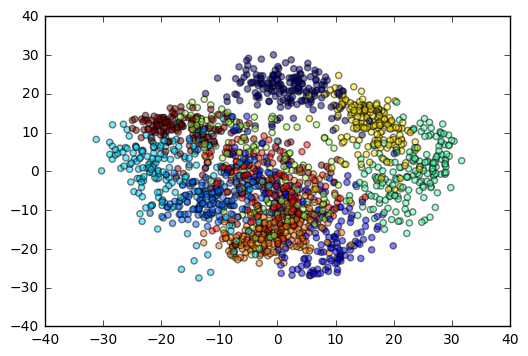

In [10]:
plt.scatter(Xproj.T[0], Xproj.T[1], c=y, alpha=0.5)

Here's a 2D projection of the entire `digits` dataset using PCA, yikes! By the way, PCA is a linear dimensionality reduction technique, so it gives us a rough idea of what a linear classifier like logistic regression has to deal with. There also exist non-linear dimensionality reduction techniques, which let you project on non-linear manifolds like spheres, instead of linear manifolds like hyperplanes.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.94814814814814818

Not so easy now, is it? But is 94.8% accuracy good "enough"? Depends on your application.

In [12]:
print_proba_table(clf.predict_proba(X_test), stride=10)

Class:	0	1	2	3	4	5	6	7	8	9
index	---	---	---	---	---	---	---	---	---	---
0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0
10	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0
20	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.999	0.001
30	0.995	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.005
40	0.0	0.995	0.0	0.0	0.0	0.0	0.0	0.0	0.005	0.0
50	0.0	0.0	0.0	0.0	0.0	0.0	0.587	0.0	0.413	0.0
60	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
70	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0
80	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0
90	0.0	0.014	0.986	0.0	0.0	0.0	0.0	0.0	0.0	0.0
100	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
110	0.0	0.0	0.0	1.0	0.0	0.0	0.0	0.0	0.0	0.0
120	0.0	0.0	0.0	0.0	0.0	0.0	0.995	0.0	0.005	0.0
130	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0	0.0
140	1.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0
150	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.091	0.909
160	0.0	0.0	0.001	0.029	0.0	0.0	0.0	0.0	0.97	0.0
170	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0
180	0.0	0.0	0.0	0.0	0.0	0.0	0.0	1.0	0.0	0.0
190	0.0	0.427	0.0	0.0	0.0	0.557	0.0	0.0	0.016	0.0
200	0.0	0.0	1.0	0.0

From this table we can tell that for a good portion of our digits our classifier had very high confidence in their class label, even with 10 different classes to choose from. But some digits were able to steal at least a tenth of a percent of confidence from our predictor across four different digits. And from `clf.score` we know that our predictor got roughly one digit wrong for every 20 digits predicted.

We can look at some of the digits where our predictor had high uncertainty.

$\boldsymbol{\hat{y}}$ is the prediction our model made and $y$ is the actual label. Would you (a human) have done better than logistic regression?

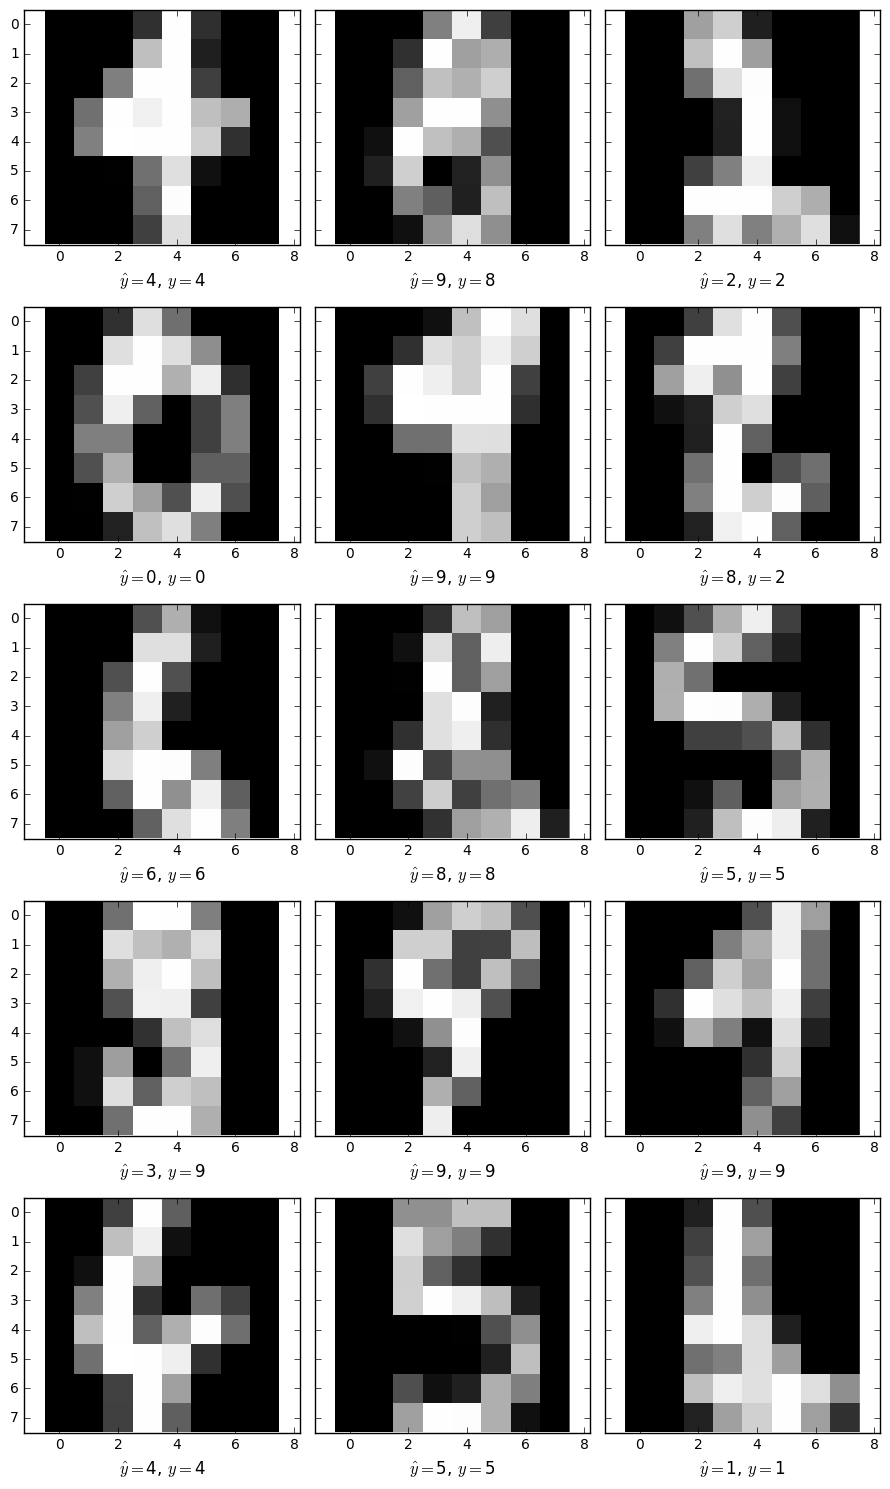

In [13]:
uncertain_indices = []
prob = clf.predict_proba(X_test)
for i in range(len(prob)):
    # number of classes with > 0.45 confidence
    contender_count = sum([1 if p > 0.45 else 0 for p in prob[i]])
    if contender_count == 2:
        uncertain_indices.append(i)
f, ax = plt.subplots(5, 3, sharex=False, sharey=True)
f.set_size_inches(9, 15)
predictions = clf.predict(X_test)
for i in range(5):
    for j in range(3):
        ax[i, j].set_xlabel(r"$\^y = $"+str(predictions[uncertain_indices[3*i + j]]) 
                        + r", $y = $"+str(y_test[uncertain_indices[3*i+j]]), size='large')
        ax[i, j].imshow(X_test[uncertain_indices[3*i + j]].reshape(8, 8), 
                        cmap='gray', interpolation='none')
f.tight_layout()